In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

In [43]:
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)
cardio1_df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
15,46.0,2,172,112.0,120,80,1,1,0,0,0,1


In [46]:
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0


In [47]:
#DBP ttest comparison for heart attack vs no heart attack
stats.ttest_ind(cardio_0['ap_lo'], cardio_1['ap_lo'], equal_var = False)

Ttest_indResult(statistic=-17.421388977639797, pvalue=8.210058598722445e-68)

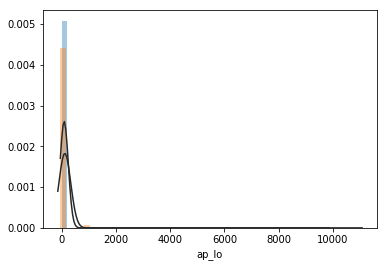

In [48]:
#Display the bell curve
sns.distplot(cardio_0['ap_lo'],fit=norm, kde=False)
sns.distplot(cardio_1['ap_lo'], fit=norm, kde=False)

In [68]:
#Get sums of 3 categories for No Heart Attack
cat1_0 = cardio_0.groupby(['gluc']).get_group(1)
cat1_0_cnt = cat1_0.count()
print(cat1_0_cnt)
cat2_0 = cardio_0.groupby(['gluc']).get_group(2)
cat2_0_cnt = cat2_0.count()
print(cat2_0_cnt)
cat3_0 = cardio_0.groupby(['gluc']).get_group(3)
cat3_0_cnt = cat3_0.count()
print(cat3_0_cnt)
total_0 = (cat3_0_cnt + cat2_0_cnt + cat1_0_cnt)
print(total_0)

#Get sums of 3 categories for Yes Heart Attack
cat1_1 = cardio_1.groupby(['gluc']).get_group(1)
cat1_1_cnt = cat1_1.count()
print(cat1_1_cnt)
cat2_1 = cardio_1.groupby(['gluc']).get_group(2)
cat2_1_cnt = cat2_1.count()
print(cat2_1_cnt)
cat3_1 = cardio_1.groupby(['gluc']).get_group(3)
cat3_1_cnt = cat3_1.count()
print(cat3_1_cnt)
total_1 = (cat3_1_cnt + cat2_1_cnt + cat1_1_cnt)
print(total_1)


age            30894
gender         30894
height         30894
weight         30894
ap_hi          30894
ap_lo          30894
cholesterol    30894
gluc           30894
smoke          30894
alco           30894
active         30894
cardio         30894
dtype: int64
age            2112
gender         2112
height         2112
weight         2112
ap_hi          2112
ap_lo          2112
cholesterol    2112
gluc           2112
smoke          2112
alco           2112
active         2112
cardio         2112
dtype: int64
age            2015
gender         2015
height         2015
weight         2015
ap_hi          2015
ap_lo          2015
cholesterol    2015
gluc           2015
smoke          2015
alco           2015
active         2015
cardio         2015
dtype: int64
age            35021
gender         35021
height         35021
weight         35021
ap_hi          35021
ap_lo          35021
cholesterol    35021
gluc           35021
smoke          35021
alco           35021
active         3502

In [75]:
#Create Chi Square DF
cs_data = pd.Series([30894, 2112, 2015], index = ["Normal", "Above Normal", "Well Above Normal"])
cs_exp = pd.Series([28585, 3078, 3316], index = ["Normal", "Above Normal", "Well Above Normal"])

cs_df = pd.DataFrame(cs_data)
cs_df[1] = cs_exp
cs_df


,0,1
Normal,30894,28585
Above Normal,2112,3078
Well Above Normal,2015,3316


In [77]:
stats.chisquare(cs_df[0], cs_df[1])

Power_divergenceResult(statistic=1000.1173915641945, pvalue=6.71842996182583e-218)